In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Covid-19 Dataset.csv")
df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI,Recovery_Classification
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,2022-12-15,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7,Delayed Recovery
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,2024-06-08,No,NaN,0,2023-08-21,NaN,Healthcare,Never,21.9,Typical Recovery
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,2023-12-19,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7,Delayed Recovery
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7,Delayed Recovery
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,2023-09-08,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9,Delayed Recovery


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  2850 non-null   object 
 11  Hospital_Discharge_Date  2850 non-null   object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Region                        0
Preexisting_Condition       469
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date     150
Hospital_Discharge_Date     150
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery            150
Reinfection                   0
Date_of_Reinfection         150
Vaccination_Status            0
Vaccine_Type               1809
Doses_Received                0
Date_of_Last_Dose           150
Long_COVID_Symptoms        2780
Occupation                    0
Smoking_Status                0
BMI                           0
Recovery_Classification     150
dtype: int64

In [6]:
df.drop("Patient_ID", axis=1, inplace=True)
df.head()

,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,Hospital_Admission_Date,...,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI,Recovery_Classification
0,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,2025-01-13,...,2022-12-15,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7,Delayed Recovery
1,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,2024-02-03,...,2024-06-08,No,NaN,0,2023-08-21,NaN,Healthcare,Never,21.9,Typical Recovery
2,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,2025-03-07,...,2023-12-19,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7,Delayed Recovery
3,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,2023-08-15,...,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7,Delayed Recovery
4,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,2023-03-12,...,2023-09-08,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9,Delayed Recovery


<Axes: xlabel='BMI', ylabel='Count'>

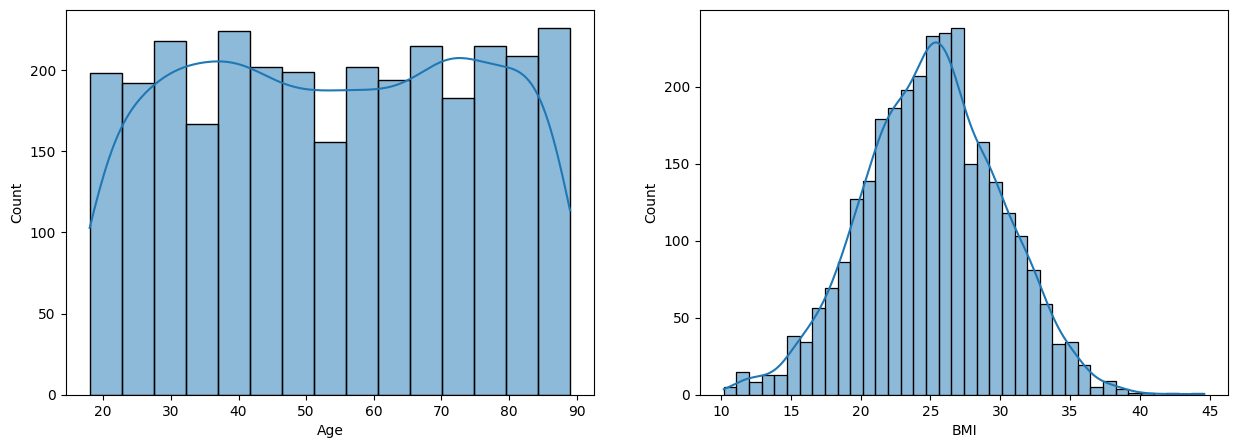

In [7]:
fig, axes = plt.subplots(ncols= 2, figsize= (15, 5))
sns.histplot(data= df, x= 'Age', kde= True, ax= axes[0])
sns.histplot(data= df, x= 'BMI', kde= True, ax= axes[1])

## Conclusion
**Age**: There are balanced samples from all age groups.  
**BMI**: The BMI is normally distributed across the dataset.

In [8]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and 'Date' not in col]
date_cols = [col for col in df.columns if df[col].dtype == 'object' and 'Date' in col]

for col in date_cols:
    df[col] = pd.to_datetime(df[col])
    
print(f"No. of Categorical Columns: {len(categorical_cols)}")
print(f"No. of Date Columns: {len(date_cols)}")

No. of Categorical Columns: 17
No. of Date Columns: 6


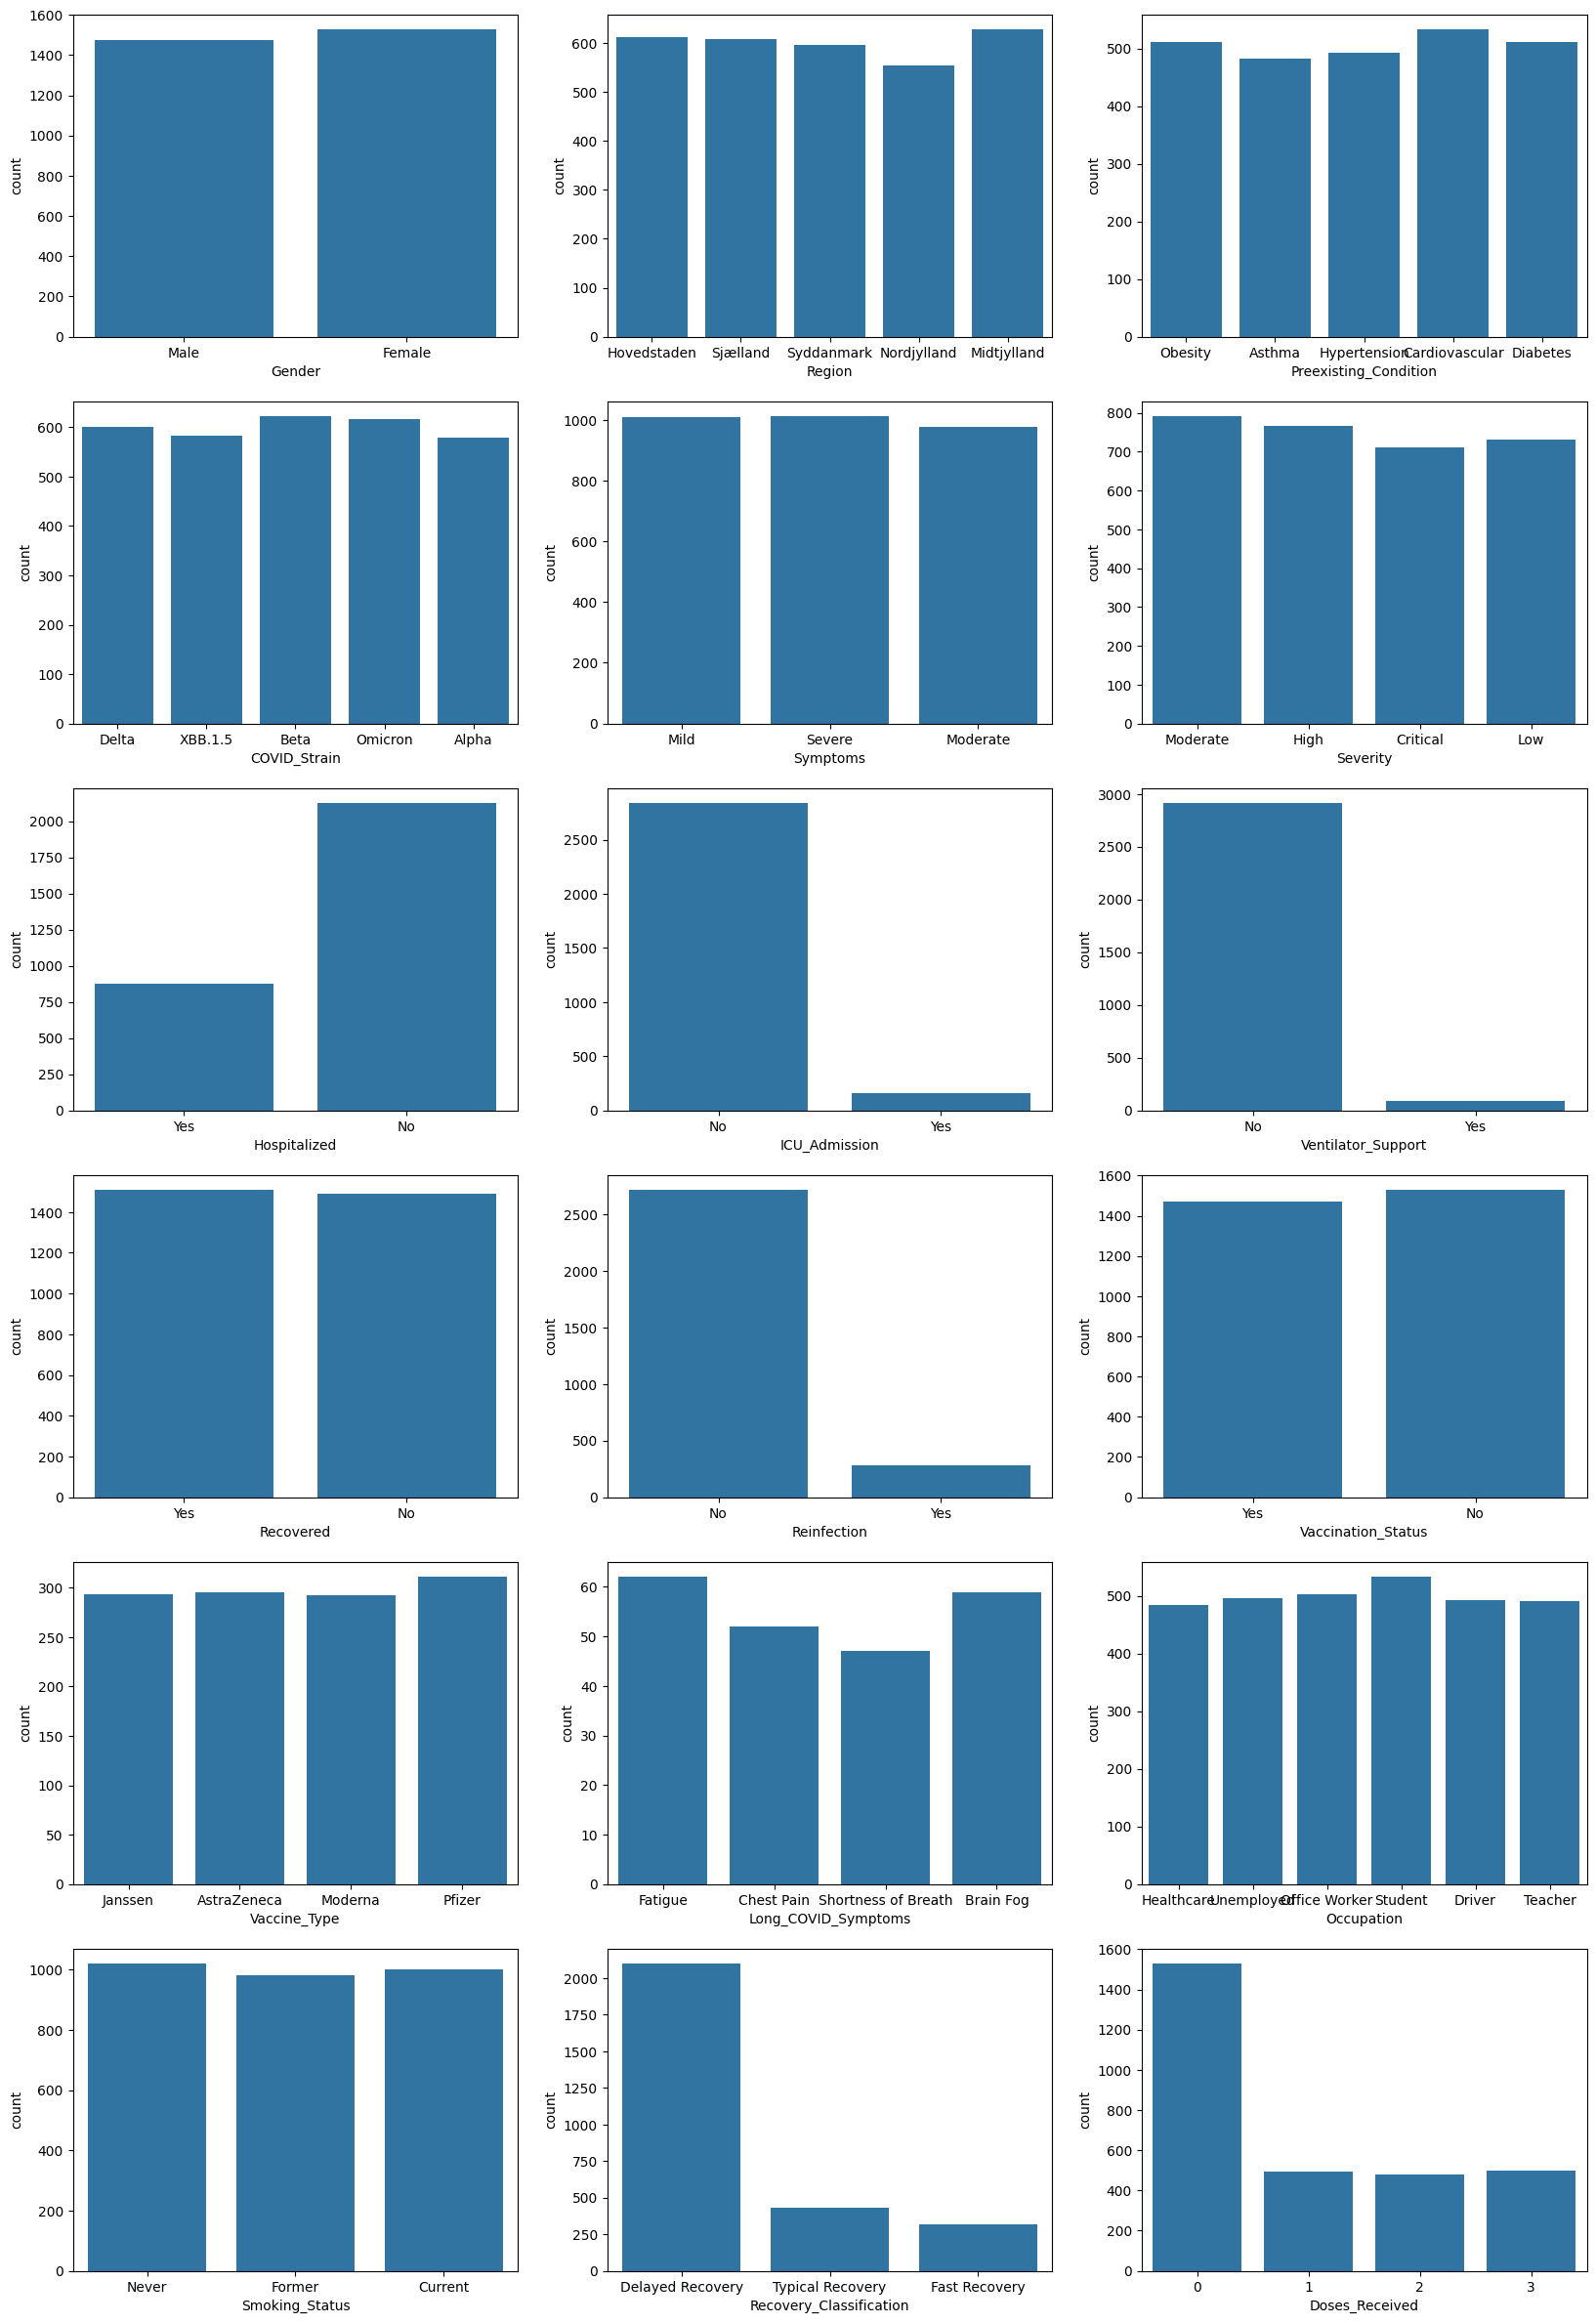

In [9]:
# Count Plots
fig, axes = plt.subplots(ncols= 3, nrows=6, figsize= (20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_cols + ['Doses_Received']):
    sns.countplot(data= df, x= col, ax= axes[i])

## Conclusions

- **Gender:** There is a balanced ratio between males and females.  
- **Region:** There is a balanced distribution of regions.  
- **Preexisting_Condition:** The samples are varied and have a nearly equal number for each condition.  
- **COVID_Strain:** There is a balanced number of samples of different COVID strains (variants).  
- **Symptoms:** There is a balanced number of samples for different symptom types.  
- **Severity:** There is a balanced number of samples for different degrees of severity.  
- **Hospitalized:** About one-third of the patients were hospitalized.  
- **ICU_Admission:** Only a small number of patients were admitted to intensive care.  
- **Ventilator_Support:** Not all patients who were admitted to intensive care needed ventilator support.  
- **Recovered:** There is an almost equal ratio between patients who recovered and those who did not.  
- **Reinfection:** Only a small number of people got reinfected.  
- **Vaccination_Status:** There is an almost equal ratio between patients who were vaccinated and those who were not.  
- **Vaccine_Type:** There is a balanced ratio of vaccination types for those who were vaccinated.  
- **Long_COVID_Symptoms:** Most patients did not experience long-term symptoms, and there is a balanced ratio of symptoms among those who did.  
- **Occupation:** There are varied occupations with an almost equal number of samples for each.  
- **Smoking_Status:** There is an equal ratio between patients who never smoked, were former smokers, and current smokers.  
- **Recovery_Classification:** Most patients had a delayed recovery.  
- **Doses_Received:** For vaccinated patients, there is a balanced ratio among those who received 1, 2, or 3 doses.  

> **Note:** The `Symptoms` and `Severity` columns have similthemvalues, so one of tClassification     150

<Axes: xlabel='Days_to_Reinfection', ylabel='Count'>

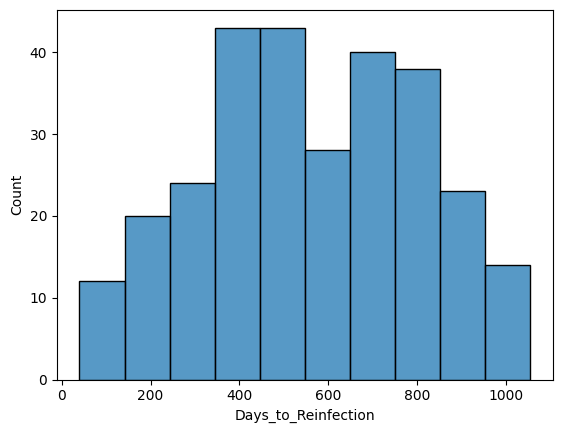

In [52]:
reinfections = df[df['Reinfection'] == 'Yes'].copy()
reinfections['Days_to_Reinfection'] = (
    reinfections['Date_of_Reinfection'] - reinfections['Date_of_Infection']
).dt.days

sns.histplot(data=reinfections, x= 'Days_to_Reinfection')

## Conclusion

- Most people who were reinfected did so between 1 to 2 years from the initil infection.

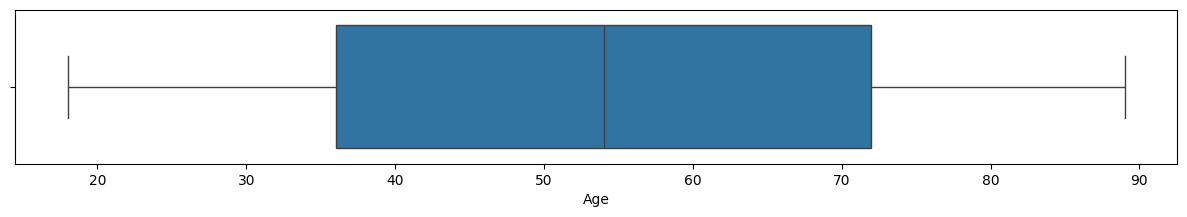

0


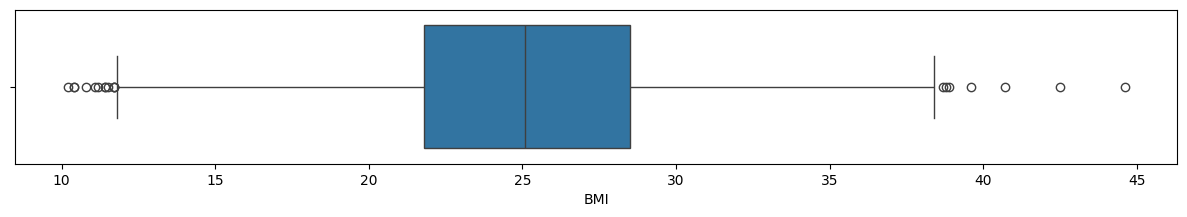

19


In [10]:
# Check for outliers
for col in ['Age', 'BMI']:
  plt.figure(figsize=(15,2))
  sns.boxplot(x=df[col])
  plt.show()
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
  print(outliers.sum())

## Conclusions

- **Age:** There are no outliers in the age column.
- **BMI:** There are 19 outliers in the bmi column to be handeled.

<Axes: xlabel='Age', ylabel='BMI'>

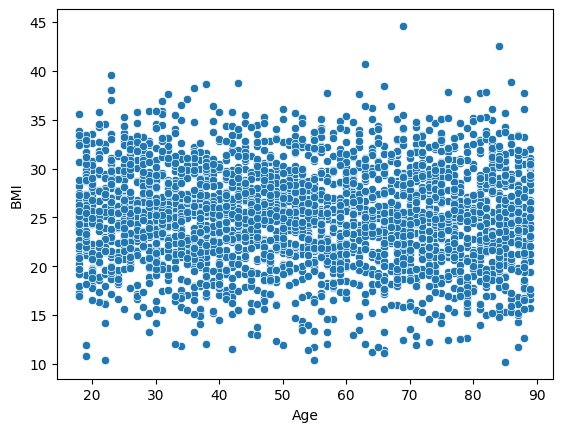

In [11]:
sns.scatterplot(data= df, x= 'Age', y= 'BMI')

## Conclusions

- The BMI is varied and balanced across age groups

<Axes: xlabel='Age'>

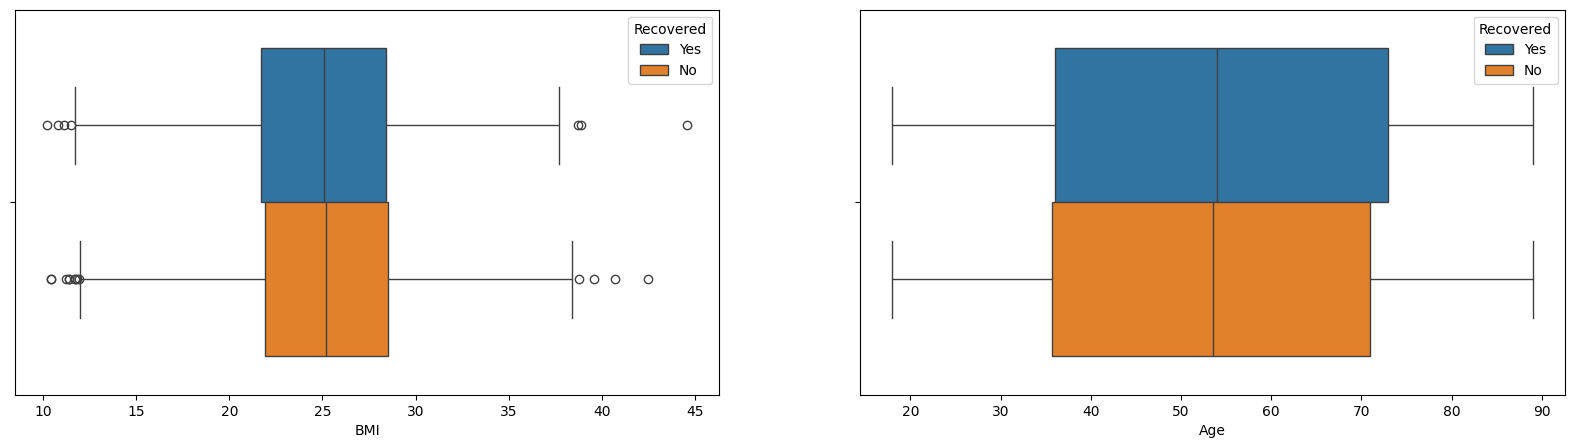

In [12]:
fig, axes = plt.subplots(ncols= 2, figsize= (20, 5))
sns.boxplot(data= df, x= 'BMI', hue= 'Recovered', ax=axes[0])
sns.boxplot(data= df, x= 'Age', hue= 'Recovered', ax=axes[1])

## Conclusions

- The ranges for bmi and age are similar for people who recovered and people who did not.

<Axes: xlabel='Age'>

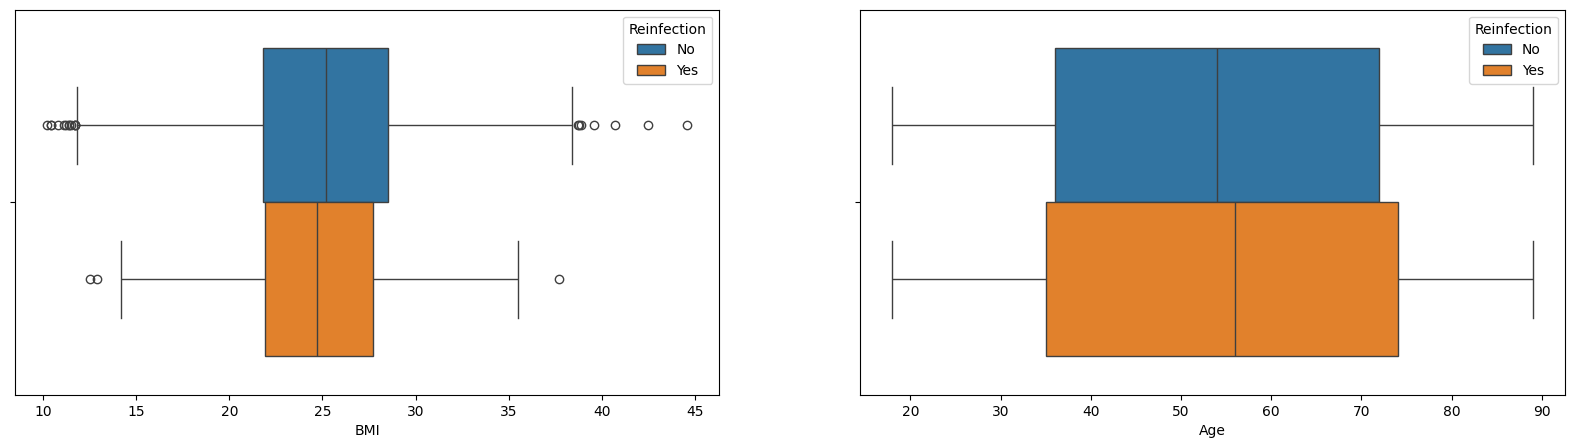

In [13]:
fig, axes = plt.subplots(ncols= 2, figsize= (20, 5))
sns.boxplot(data= df, x= 'BMI', hue= 'Reinfection', ax=axes[0])
sns.boxplot(data= df, x= 'Age', hue= 'Reinfection', ax=axes[1])

## Conclusions

- The ranges for bmi and age are similar for people who were reinfected and people who were not.

<Axes: >

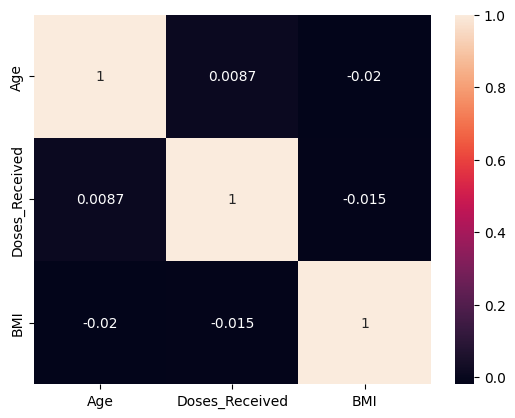

In [14]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot= True)

## Conclusions

- There is a low correlation between numeric columns.